# Neural Networks

## Introduction



In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Gradient Descent

Gradient descent is a widely used optimization algorithm in machine learning.

Let us look at a simple function, e.g.:

$$
f(x) = 5 + 2 * x^2
$$

We can find the minimum of this function by taking the derivative of the function and setting it to zero:

$$
f'(x) = 4 * x
$$

$$
4 * x = 0
$$

$$
x = 0
$$

So, the minimum of the function is at $x = 0$ (check the sufficient condition for minimum as a homework).


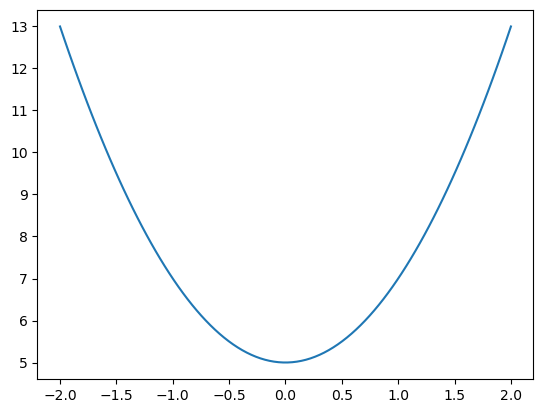

In [12]:

def simple_func(x: np.ndarray) -> float:
    return 5 + 2 * x ** 2

x = np.linspace(-2, 2, 100)
y = simple_func(x)

plt.plot(x, y)
plt.show()


In this simple example we have picked a rather convenient function but in practice we may be dealing with really complex functions where it is not possible to find the minimum analytically. This is the use case of gradient descent.

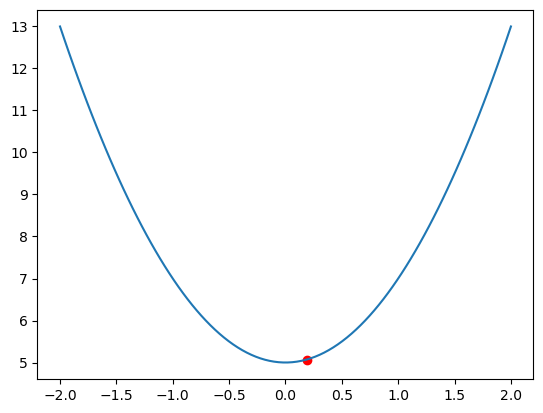

In [13]:
# Let's pick a random point
x0 = np.random.uniform(-2, 2)
y0 = simple_func(x0)

# Let's plot the function and the point

plt.plot(x, y)
plt.scatter(x0, y0, color='red')
plt.show()

In [14]:
# And let's compute the gradient at that point

def simple_func_grad(x: np.ndarray) -> float:
    return 4 * x

x0_grad = simple_func_grad(x0)
x0_grad

0.7557159868115573


The gradient is non-zero, so we can move in the opposite direction of the gradient to get closer to the minimum

$$
x_{n+1} = x_n - \alpha f'(x_n)
$$

where $\alpha$ is the learning rate. Let us set $\alpha = 0.1$.

In our case the next value of $x$ will be:

$$
x_{n+1} = x_n - \alpha * 4 * x_n
$$


Starting at x0 = 0.19, y0 = 5.07
Move to x1 = 0.11, y1 = 5.03


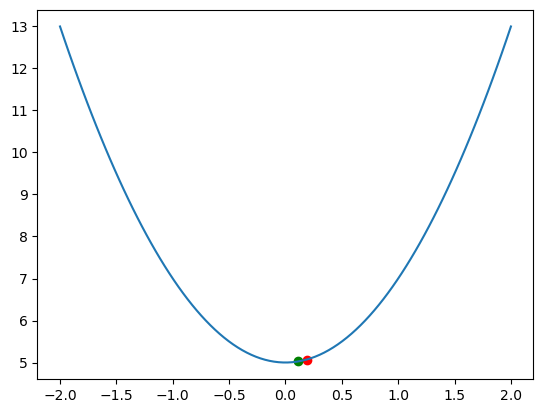

In [15]:
x1 = x0 - 0.1 * x0_grad
y1 = simple_func(x1)

print("Starting at x0 = {:.2f}, y0 = {:.2f}".format(x0, y0))
print("Move to x1 = {:.2f}, y1 = {:.2f}".format(x1, y1))

plt.plot(x, y)
plt.scatter(x0, y0, color='red')
plt.scatter(x1, y1, color='green')
plt.show()


The gradient is still positive, so we need to update $x$ again:

$$
x_{n+2} = x_{n+1} - \alpha 4 x_{n+1}
$$

Starting at x1 = 0.11, y1 = 5.03
Move to x2 = 0.07, y2 = 5.01


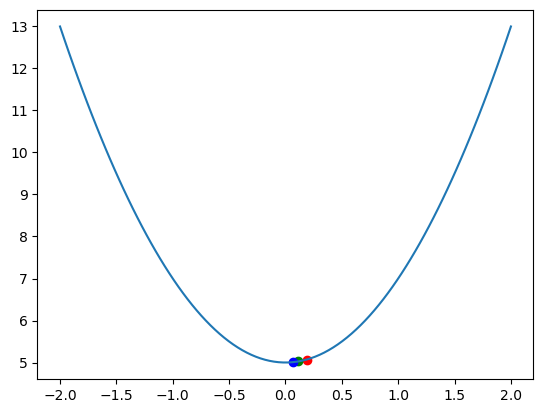

In [16]:
x2 = x1 - 0.1 * simple_func_grad(x1)
y2 = simple_func(x2)

print("Starting at x1 = {:.2f}, y1 = {:.2f}".format(x1, y1))
print("Move to x2 = {:.2f}, y2 = {:.2f}".format(x2, y2))

plt.plot(x, y)
plt.scatter(x0, y0, color='red')
plt.scatter(x1, y1, color='green')
plt.scatter(x2, y2, color='blue')
plt.show()


Notice that the steps we are taking are getting smaller as we approach the minimum (because the gradient is getting smaller).


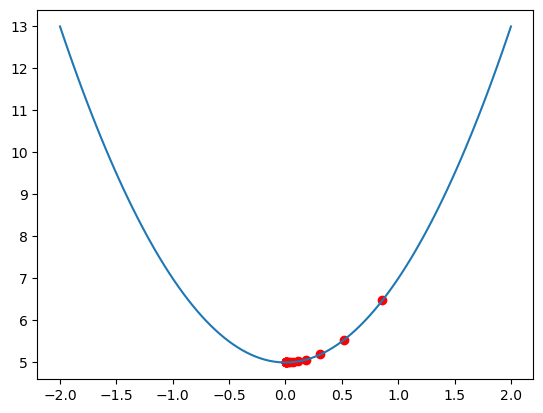

In [18]:
# Now let us do this in a loop

x0 = np.random.uniform(-2, 2)
y0 = simple_func(x0)
lr = 0.1

x_lst = [x0]
y_lst = [y0]

for i in range(15):
    x1 = x0 - lr * simple_func_grad(x0)
    y1 = simple_func(x1)
    # print("Starting at x0 = {:.2f}, y0 = {:.2f}".format(x0, y0))
    # print("Move to x1 = {:.2f}, y1 = {:.2f}".format(x1, y1))
    
    # Store the intermediate results for plotting
    x_lst.append(x1)
    y_lst.append(y1)
    
    x0 = x1
    y0 = y1
    
plt.plot(x, y)
plt.scatter(x_lst, y_lst, color='red')
plt.show()


## Two Dimensional Example

Let us look at a two-dimensional example:

$$
f(x, y) = 5 + 2 x^2 + 3 (y - 2)^2
$$

with a gradient:

$$
\nabla f = \begin{bmatrix} 4 x \\ 6 (y - 2) \end{bmatrix}
$$

We can find the minimum of this function by taking the derivative of the function and setting it to zero:

$$
\frac{\partial f}{\partial x} = 4 x = 0 \\
\frac{\partial f}{\partial y} = 6 (y - 2) = 0
$$

So the minimum is at:

$$
x = 0 \\
y = 2
$$

and the minimum value is:

$$
f(0, 2) = 5 + 2 \cdot 0^2 + 3 (2 - 2)^2 = 5
$$

In [19]:
def f2d(x: np.ndarray, y: np.ndarray) -> float:
    return 5 + 2 * x ** 2 + 3 * (y - 2) ** 2


def f2d_grad(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return np.array([4 * x, 6 * (y - 2)])

f2d(0, 2)

5

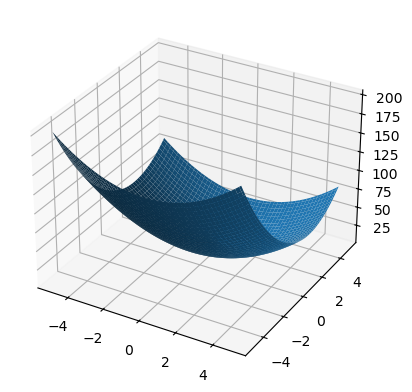

In [20]:
# Let's plot this function

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f2d(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()


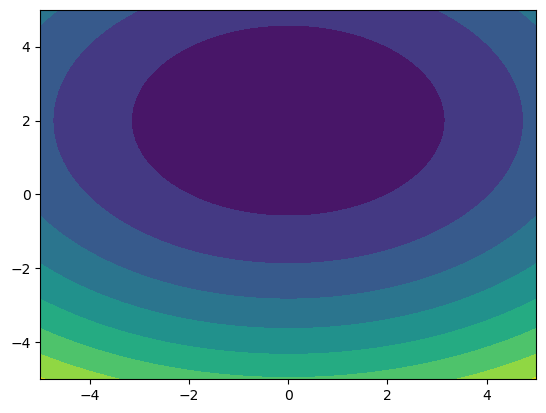

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z)
plt.show()

In [22]:
# Now we pick a random point

x0 = np.random.uniform(-5, 5)
y0 = np.random.uniform(-5, 5)

z0 = f2d(x0, y0)

# The gradient at that point

f2d_grad(x0, y0)


array([  7.90915298, -29.03463027])

Starting at x0 = 1.98, y0 = -2.84, z0 = 83.07
Move to x1 = 1.19, y1 = 5.00, z1 = 34.81


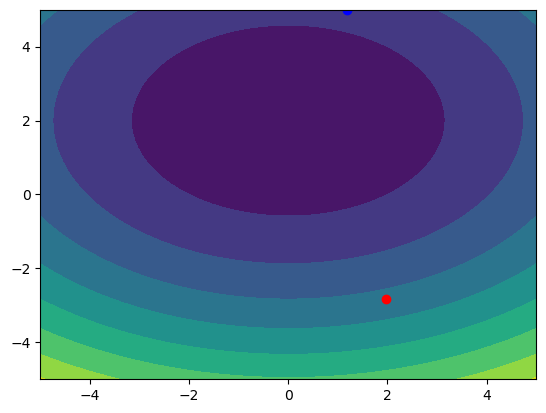

In [23]:
# The gradient is non-zero in both directions and is steeper in the y direction

x1 = x0 - 0.1 * f2d_grad(x0, y0)[0]
y2 = y0 - 0.1 * f2d_grad(x0, y0)[1]

z1 = f2d(x1, y1)

print("Starting at x0 = {:.2f}, y0 = {:.2f}, z0 = {:.2f}".format(x0, y0, z0))
print("Move to x1 = {:.2f}, y1 = {:.2f}, z1 = {:.2f}".format(x1, y1, z1))

# Make a countour plot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z)
plt.scatter(x0, y0, color='red')
plt.scatter(x1, y1, color='blue')
plt.show()

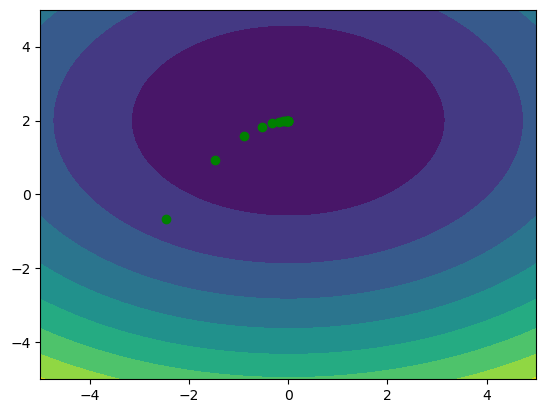

In [25]:
x0 = np.random.uniform(-5, 5)
y0 = np.random.uniform(-5, 5)
z0 = f2d(x0, y0)

lr = 0.1

x_lst = [x0]
y_lst = [y0]
z_lst = [z0]

for i in range(15):
    x1 = x0 - lr * f2d_grad(x0, y0)[0]
    y1 = y0 - lr * f2d_grad(x0, y0)[1]
    z1 = f2d(x1, y1)
    
    # print("Starting at x0 = {:.2f}, y0 = {:.2f}, z0 = {:.2f}".format(x0, y0, z0))
    # print("Move to x1 = {:.2f}, y1 = {:.2f}, z1 = {:.2f}".format(x1, y1, z1))
    
    x_lst.append(x1)
    y_lst.append(y1)
    z_lst.append(z1)
    
    x0 = x1
    y0 = y1
    z0 = z1    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z)
ax.scatter(x_lst, y_lst, color='green')
plt.show()